# Communicate Data Findings in PISA 2012
## by Patrick Hirschi

## Investigation Overview

I want to answer the following questions:
  
* How well do students from individual countries perform in the observed subjects Math, Reading and Science? Therefore we want to calculate a score for each subject and student which is basically the mean value of the computed plausible values (1 to 5) for a subject.
* Are there countries that perform better than others?
* Is there a difference between female and male students in each of the observed subjects?
* What is the impact of the accessibility/availability of internet on the overall performance?

## Dataset Overview

"PISA 2012 is the programme’s 5th survey. It assessed the competencies of 15-year-olds in reading, mathematics and science (with a focus on mathematics) in 65 countries and economies. In 44 of those countries and economies about 85 000 students also took part in an optional assessment of creative problem solving; and in 18 countries and economies, students were assessed in financial literacy.
  
Around 510 000 students between the ages of 15 years 3 months and 16 years 2 months participated in PISA 2012 as a whole representing about 28 million 15-year-olds globally. 
  
The students took a paper-based test that lasted 2 hours. The tests were a mixture of open-ended and multiple-choice questions that were organised in groups based on a passage setting out a real-life situation. A total of about 390 minutes of test items were covered.  Students took different combinations of different tests. They and their school principals also answered questionnaires to provide information about the students' backgrounds, schools and learning experiences and about the broader school system and learning environment."
  
Source: [Pisa 2012 Survey Description](http://www.oecd.org/pisa/aboutpisa/pisa-2012-results.htm "OECD Homepage")

In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# the dataset consists of more than 600 columns and we want so see all of them
# to be sure to have all columns i will set the max value to 700
pd.set_option('display.max_rows', 700)
pd.set_option('display.max_columns', 700)

# let's import the dataset
pisa_2012 = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project5\\pisa2012.csv", 
                        encoding='latin-1', low_memory = False)

# ...and import the column descriptions accordingly
pisa_2012_dict = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project5\\pisadict2012.csv", 
                        encoding='latin-1', low_memory = False)

pisa_2012_clean = pisa_2012.copy()

# limit the dataset to the columns we actually need to answer our questions
pisa_2012_clean = pisa_2012_clean[['CNT', 'ST03Q02', 'ST04Q01', 'AGE', 'PV1MATH', 'PV2MATH', 
                       'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 
         'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 
                       'PV5SCIE', 'ST26Q06']]

# replace missing age values with the mean age in the dataset
pisa_2012_clean.loc[np.isfinite(pisa_2012_clean['AGE']) == False, 'AGE'] = pisa_2012_clean['AGE'].mean()
pisa_2012_clean.loc[pisa_2012_clean['ST26Q06'].isna() == True,'ST26Q06'] = 'Unknown'

# compute the mean performance for each student in a specific subject and store it in a separate column
pisa_2012_clean['Mathematics'] = (pisa_2012_clean['PV1MATH'] + pisa_2012_clean['PV2MATH'] + pisa_2012_clean['PV3MATH']
                           + pisa_2012_clean['PV4MATH'] + pisa_2012_clean['PV5MATH']) / 5
pisa_2012_clean['Reading'] = (pisa_2012_clean['PV1READ'] + pisa_2012_clean['PV2READ'] + pisa_2012_clean['PV3READ']
                              + pisa_2012_clean['PV4READ'] + pisa_2012_clean['PV5READ']) / 5
pisa_2012_clean['Science'] = (pisa_2012_clean['PV1SCIE'] + pisa_2012_clean['PV2SCIE'] + pisa_2012_clean['PV3SCIE']
                              + pisa_2012_clean['PV4SCIE'] + pisa_2012_clean['PV5SCIE']) / 5
# change column types to float
pisa_2012_clean['Mathematics']=pisa_2012_clean['Mathematics'].astype(float)
pisa_2012_clean['Reading']=pisa_2012_clean['Reading'].astype(float)
pisa_2012_clean['Science']=pisa_2012_clean['Science'].astype(float)

# drop all columns that are now replaced by the new computed mean columns
pisa_2012_clean.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ',
                          'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 
                          'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

# rename the columns
pisa_2012_clean.rename({'CNT' : 'Country', 
                  'ST03Q02' : 'Year Of Birth', 
                  'ST04Q01' : 'Gender', 
                  'ST26Q06' : 'Internet Access',
                  'AGE' : 'Age'
                  }, axis = 'columns', inplace = True)


## Univariate Analysis Of Scores Across Students

First we want to see the distribution of scores for each of the subject and the whole dataset.

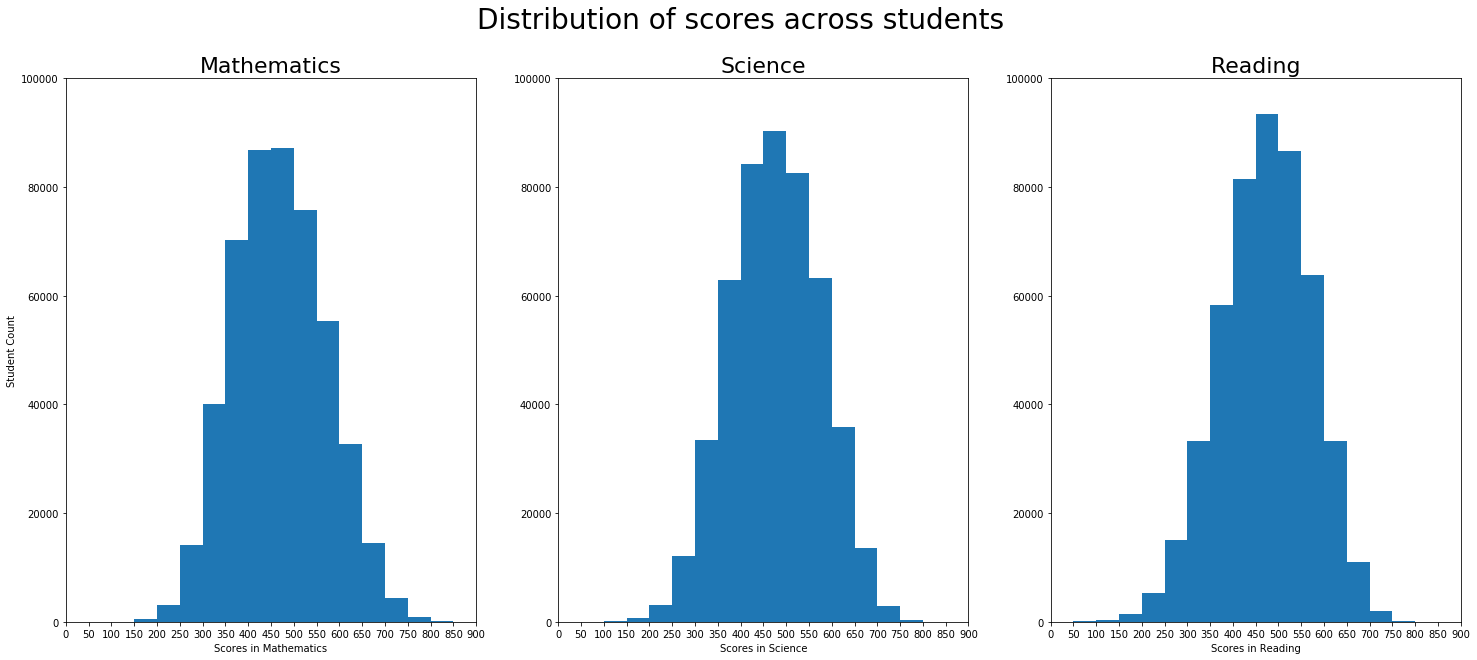

In [3]:
plt.figure(figsize = [25, 10])

bins_hist = np.arange(0, 900 + 1, 50)

# subplot 1/3
plt.subplot(1, 3, 1)
plt.hist(pisa_2012_clean['Mathematics'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Scores in Mathematics');
plt.ylabel('Student Count')
plt.title("Mathematics", fontsize=22);

# subplot 2/3
plt.subplot(1, 3, 2)
plt.hist(pisa_2012_clean['Science'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Scores in Science');
plt.title("Science", fontsize=22);

# subplot 3/3
plt.subplot(1, 3, 3)
plt.hist(pisa_2012_clean['Reading'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Scores in Reading');
plt.title("Reading", fontsize=22);
# set the overall title
plt.suptitle('Distribution of scores across students', fontsize=28)
# save the output as png for further use
plt.savefig('univariate_barplot_subjectscores.png')
plt.show()

We see the following things:
* all distributions are unimodal
* the scores in each of the subjects seem to be normally distributed
* the major part of the students gets a score between 300 and 600

## Univariate Analysis Of Gender Performance

Next we want to investigate the performances grouped by gender. Are there any subjects that show a difference between female and male students? What about the overall performance? 

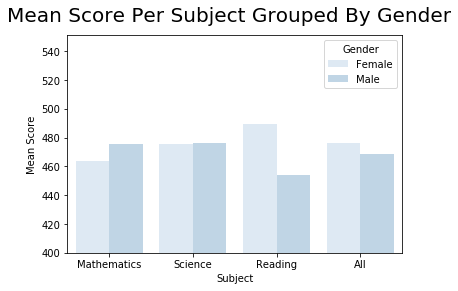

In [4]:
# compute the mean scores and an overall mean
df_gender_comparison = pisa_2012_clean.groupby(['Gender'])[['Mathematics','Science','Reading']].mean().reset_index()
df_gender_comparison['All'] = (df_gender_comparison['Mathematics'] 
                          + df_gender_comparison['Science'] 
                          + df_gender_comparison['Reading']) / 3
# initiate the output dataframe
cols = ['Gender','Subject','Mean Score']
df_gender = pd.DataFrame(columns=cols)
# iterate through dataframe and set up the desired structure in new dataframe
for index, row in df_gender_comparison.iterrows(): 
    for columnname in ['Mathematics','Science','Reading','All']:
        df_gender = df_gender.append({'Gender': row['Gender'],
                                 'Subject': columnname,
                                 'Mean Score': row[columnname]}, ignore_index=True)

sns.barplot(x="Subject",y="Mean Score",hue="Gender",data=df_gender, palette=sns.color_palette("Blues"))
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Gender', fontsize=20)
plt.ylim(400, 550 + 1);
# save the output as png for further use
plt.savefig('univariate_boxplot_gendercomparison.png')
plt.show()

Especially for the Reading test we see a big difference in favor of the female students reaching more than 30 points more! Male students seem to be slightly better in Mathematics though while for the subject Science it seems to be very balanced. The overall performance of female students still seems to be better than the one from male students.

## Univariate Analysis Of The Impact Of Internet Access

Next we want to see the impact of internet access on the performance.

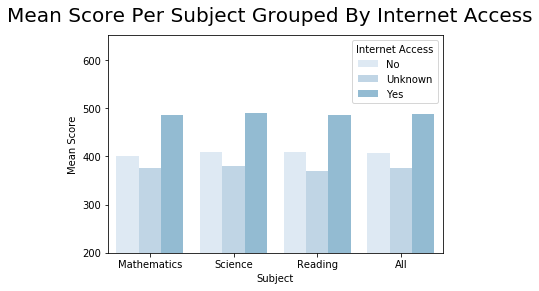

In [5]:
# compute the mean scores and an overall mean
df_internet_comparison = pisa_2012_clean.groupby(['Internet Access'])[['Mathematics','Science','Reading']].mean().reset_index()
df_internet_comparison['All'] = (df_internet_comparison['Mathematics'] 
                          + df_internet_comparison['Science'] 
                          + df_internet_comparison['Reading']) / 3
# initiate the output dataframe
cols = ['Internet Access','Subject','Mean Score']
df_internet_access = pd.DataFrame(columns=cols)
# iterate through dataframe and set up the desired structure in new dataframe
for index, row in df_internet_comparison.iterrows(): 
    for columnname in ['Mathematics','Science','Reading','All']:
        df_internet_access = df_internet_access.append({'Internet Access': row['Internet Access'],
                                 'Subject': columnname,
                                 'Mean Score': row[columnname]}, ignore_index=True)

sns.barplot(x="Subject",y="Mean Score",hue="Internet Access",data=df_internet_access, palette=sns.color_palette("Blues"))
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Internet Access', fontsize=20)
plt.ylim(200, 650 + 1);
# save the output as png for further use
plt.savefig('univariate_boxplot_internetaccesscomparison.png')
plt.show()

Wow, that is amazing. I did not expect the impact to be that big. In each of the categories we see a significant difference in favor of the students that have internet access at home.

## Bivariate Analysis Of Performance Across Countries

In the bivariate part of the analysis we want to focus on the performances of different countries. Let's plot an overview figure comparing the performance of each country for each subject as well as the overall performance. All of the boxes need to be sorted descending.

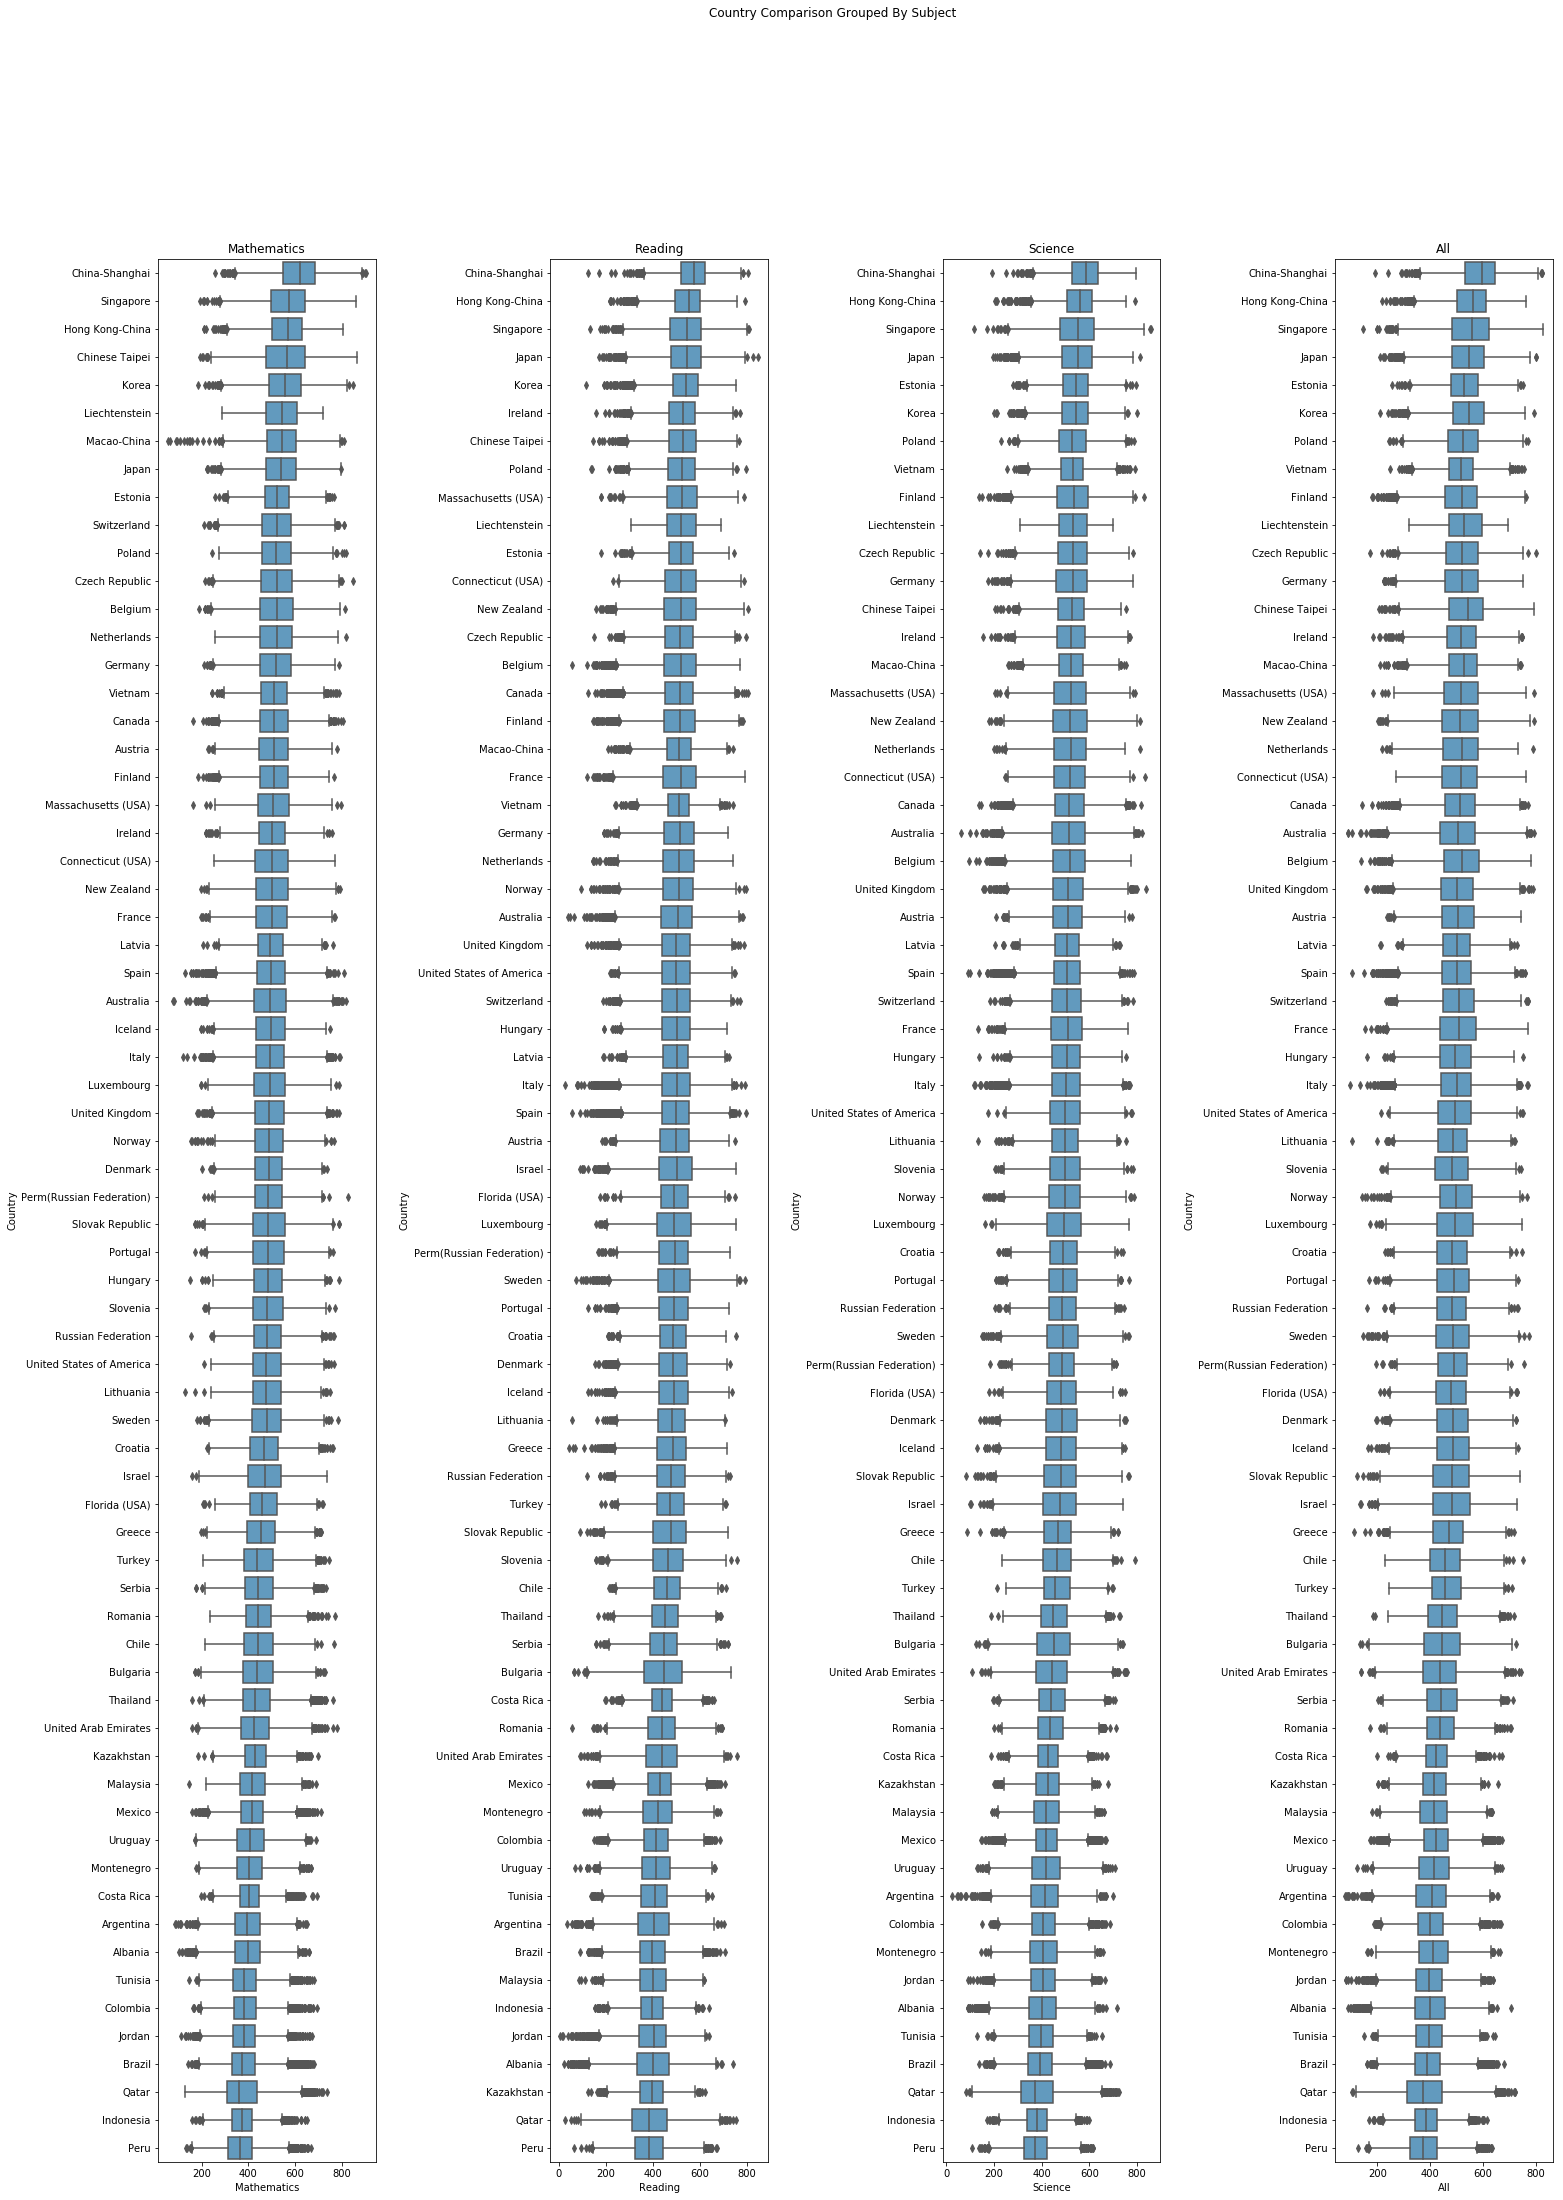

In [6]:
# set up the figure
plt.figure(figsize = [25, 35])
plt.subplots_adjust(wspace = 0.80) # control whitespace

pisa_2012_clean['All'] = (pisa_2012_clean['Mathematics'] 
                          + pisa_2012_clean['Science'] 
                          + pisa_2012_clean['Reading']) / 3

# set the orders descending
math_order = pisa_2012_clean.groupby('Country')['Mathematics'].mean().sort_values(ascending = False).index
reading_order = pisa_2012_clean.groupby('Country')['Reading'].mean().sort_values(ascending = False).index
science_order = pisa_2012_clean.groupby('Country')['Science'].mean().sort_values(ascending = False).index
all_order = pisa_2012_clean.groupby('Country')['All'].mean().sort_values(ascending = False).index

# subplot 1/4
plt.subplot(1, 4, 1)
sns.boxplot(x = pisa_2012_clean['Mathematics'], y = pisa_2012_clean['Country'], 
            order = math_order, color=sns.color_palette("Blues")[3]);
plt.ylabel('Country')
plt.title('Mathematics');

#subplot 2/4
plt.subplot(1, 4, 2)
sns.boxplot(x = pisa_2012_clean['Reading'], y = pisa_2012_clean['Country'], 
            order = reading_order, color=sns.color_palette("Blues")[3]);
plt.title('Reading');

# subplot 3/4
plt.subplot(1, 4, 3)
sns.boxplot(x = pisa_2012_clean['Science'], y = pisa_2012_clean['Country'], 
            order = science_order, color=sns.color_palette("Blues")[3]);
plt.title('Science');

# subplot 4/4
plt.subplot(1, 4, 4)
sns.boxplot(x = pisa_2012_clean['All'], y = pisa_2012_clean['Country'], 
            order = science_order, color=sns.color_palette("Blues")[3]);
plt.title('All');

# set the overall title
plt.suptitle('Country Comparison Grouped By Subject');
# save the output as png for further use
plt.savefig('bivariate_boxplot_countrycomparison.png')
plt.show()

China-Shanghai is in the top spot for all of the subjects and therefore also tops the overall rankings. The opposite is the case for Peru that ranks last in all of the categories.

## Multivariate Analysis Of Subject Correlations

First we want to further investigate the scores in each subject. We want to see if there are correlations between different subjects and therefore choose to plot a pairplot.

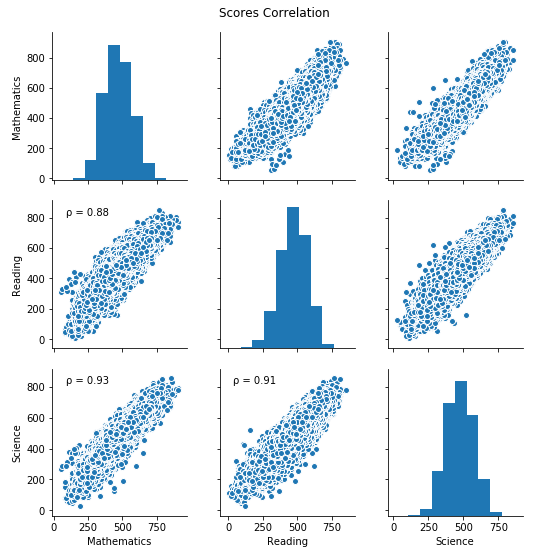

In [7]:
# source: https://stackoverflow.com/questions/50832204/show-correlation-values-in-pairplot-using-seaborn-in-python
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(data = pisa_2012_clean, vars=["Mathematics", "Reading", "Science"]);
g.map_lower(corrfunc)
plt.suptitle("Scores Correlation", y = 1.02);
# save the output as png for further use
plt.savefig('multivariate_pairplot_subjectcomparison.png')
plt.show()

We see a good correlation for all of the pair plots (0.88 / 0.93 / 0.91). This means that the performance of individual students for a specific subject does not vary much compared to the performance in other subjects. The strongest correlation between the subjects is between Mathematics and Science which does not seem very surprising.